**CHICAGO TAXI FARE PREDICTION**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [3]:
df = pd.read_csv("Taxi_Trips_-_2024_20240408.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184976 entries, 0 to 184975
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     184976 non-null  object 
 1   Taxi ID                     184976 non-null  object 
 2   Trip Start Timestamp        184976 non-null  object 
 3   Trip End Timestamp          184975 non-null  object 
 4   Trip Seconds                184957 non-null  float64
 5   Trip Miles                  184976 non-null  float64
 6   Pickup Census Tract         76525 non-null   float64
 7   Dropoff Census Tract        73634 non-null   float64
 8   Pickup Community Area       179919 non-null  float64
 9   Dropoff Community Area      167420 non-null  float64
 10  Fare                        184505 non-null  float64
 11  Tips                        184505 non-null  float64
 12  Tolls                       184505 non-null  float64
 13  Extras        

In [4]:
df = df[['Trip Miles','Trip Seconds','Fare']]
df.head()
df = df.dropna(subset=['Trip Miles','Trip Seconds', 'Fare'])
df['Speed'] = df['Trip Miles'] / (df['Trip Seconds'] / 3600)
df.to_csv('data_cleaned.csv', index=False)

In [5]:
trip_miles_threshold = df['Trip Miles'].quantile(0.99)
fare_threshold = df['Fare'].quantile(0.99)
speed_threshold = df['Speed'].quantile(0.99)
df = df[(df['Trip Miles'] <= trip_miles_threshold) & (df['Fare'] <= fare_threshold) & (df['Speed'] <= speed_threshold)]
df.describe()

,Trip Miles,Trip Seconds,Fare,Speed
count,177048.000000,177048.000000,177048.000000,177048.000000
mean,6.451494,1171.425342,21.416696,17.323303
std,6.459974,1457.998460,15.145043,12.315361
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,480.000000,8.250000,8.590909
50%,3.200000,925.000000,15.750000,14.119303
75%,11.780000,1620.000000,33.750000,25.721961
max,25.980000,86340.000000,71.250000,52.606325


In [6]:
X = df[['Trip Miles','Trip Seconds','Speed']]
y = df['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(141638, 3) (35410, 3) (141638,) (35410,)


In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)
mean_squared_error_value = mean_squared_error(y_test, y_pred)
r2_score_value = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mean_squared_error_value}')
print(f'R^2 Score: {r2_score_value}')

Mean Squared Error: 56.37644945647827
R^2 Score: 0.7558376293488329


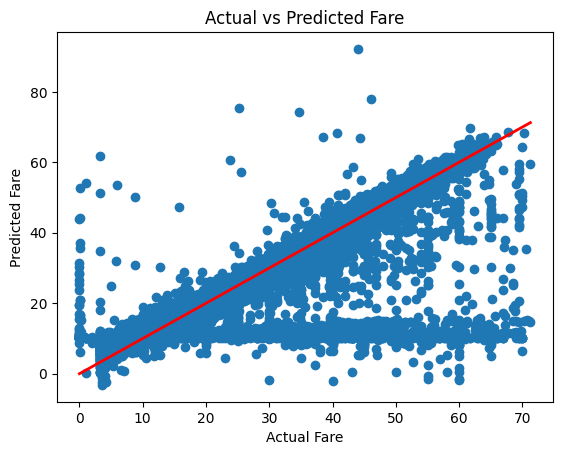

In [9]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # y=x line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()

In [10]:
joblib.dump(model, 'taxi_fare_model.joblib')
print("Model exported as taxi_fare_model.joblib")

Model exported as taxi_fare_model.joblib
